# Regressão linear sobre os dados abertos do programa cidades digitais
O programa Cidades Digitais promove a inclusão dos órgãos públicos das Prefeituras Municipais no mundo das TIC, com os objetivos de modernizar a gestão, ampliar o acesso aos serviços públicos e promover o desenvolvimento dos municípios brasileiros por meio da tecnologia

* Ponto de enlace e acesso social - PEAS, ponto central da
Cidade Digital, o local onde chega o backhaul de internet e onde se
prevê a instalação da SGI (solução gerenciadora da infraestrutura);
* Solução gerenciadora da infraestrutura - SGI, núcleo de
gerenciamento - onde estarão instalados os servidores de gerenciamento da rede e controle dos usuários;
* PAG/PCG - Pontos de Acesso de Governo/Pontos de Conexão de Governo - estes pontos se destinam ao atendimento de
espaços associados à administração pública e à prestação de serviços
à população por qualquer esfera de governo, conforme projeto aprovado pelo MC;
* PAP - Pontos de Acesso Público - pontos com a finalidade de permitir acesso aberto à população (hotspots);

# carregar dados

In [14]:
import pandas as pd
#df = pd.read_csv('dados/dadosabertos_cidadesdigitais_jan.csv', sep=';')
df = pd.read_csv('dados/cidades_digitais_mesclado.csv')

In [15]:
df.head()

,Unnamed: 0,id,codigo_ibge,nome,uf,latitude,longitude,UF,Cidade,CÓDIGO IBGE,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
0,0,17,4204806,Curitibanos,SC,-27.292924,-50.617546,SC,Curitibanos,4204806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,23,2301307,Araripe,CE,-7.239286,-40.076542,CE,Araripe,2301307.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,24,2412104,São João do Sabugi,RN,-6.690416,-37.188507,RN,São João do Sabugi,2412104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,38,3550100,São Manuel,SP,-22.682258,-48.540428,SP,São Manuel,3550100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,41,3550407,São Pedro,SP,-22.558177,-47.924688,SP,São Pedro,3550407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df[['uf','nome', 'codigo_ibge', 'latitude', 'longitude', 'POPULAÇÃO ESTIMADA', 'Valor Previsto', 'PEAS', 'PAG', 'PCG', 'PONTOS ATENDIDOS', 'Status', 'Status Implantação']]

# análise exploratória dos dados

In [17]:
df.shape

(334, 13)

In [18]:
df.describe()

,codigo_ibge,latitude,longitude,PEAS,PAG,PCG,PONTOS ATENDIDOS
count,3.340000e+02,334.000000,334.000000,334.0,334.000000,279.000000,334.000000
mean,2.895998e+06,-12.910098,-45.363799,1.0,4.835329,16.885305,22.461078
std,9.685694e+05,8.514918,6.531698,0.0,6.207605,10.396515,9.632121
min,1.100106e+06,-31.763669,-71.444935,1.0,0.000000,0.000000,5.000000
25%,2.209124e+06,-21.213465,-49.833703,1.0,2.000000,10.000000,15.250000
50%,2.902807e+06,-11.019275,-44.221678,1.0,2.000000,15.000000,21.000000
75%,3.514815e+06,-5.667738,-40.280642,1.0,2.000000,22.500000,27.000000
max,5.300108e+06,1.746762,-35.044884,1.0,30.000000,52.000000,58.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uf                  334 non-null    object 
 1   nome                334 non-null    object 
 2   codigo_ibge         334 non-null    int64  
 3   latitude            334 non-null    float64
 4   longitude           334 non-null    float64
 5   POPULAÇÃO ESTIMADA  334 non-null    object 
 6   Valor Previsto      334 non-null    object 
 7   PEAS                334 non-null    int64  
 8   PAG                 334 non-null    int64  
 9   PCG                 279 non-null    float64
 10  PONTOS ATENDIDOS    334 non-null    int64  
 11  Status              333 non-null    object 
 12  Status Implantação  334 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 34.1+ KB


In [20]:
df.isnull().sum()

uf                     0
nome                   0
codigo_ibge            0
latitude               0
longitude              0
POPULAÇÃO ESTIMADA     0
Valor Previsto         0
PEAS                   0
PAG                    0
PCG                   55
PONTOS ATENDIDOS       0
Status                 1
Status Implantação     0
dtype: int64

# limpeza dos dados

In [21]:
# manipulando valores em falta
df.dropna(inplace=True)

In [22]:
df['POPULAÇÃO ESTIMADA'] = pd.to_numeric(df['POPULAÇÃO ESTIMADA'], errors='coerce')

In [23]:
x = df['Valor Previsto'].replace('[R$. ]', '', regex=True)
x = x.replace('[,]', '.', regex=True)
df['Valor Previsto'] = pd.to_numeric(x, errors='coerce')
#df['Valor Previsto'] = df['Valor Previsto'].apply(lambda x: float(x.replace(".","").replace(",",".")))
#df['Valor Previsto']

In [24]:
df['Valor Previsto']

0      1425445.82
1       436666.00
3      1119305.92
4      1015248.54
5      1980602.66
          ...    
329     577921.74
330     555385.46
331     772597.30
332     800468.71
333     547505.97
Name: Valor Previsto, Length: 278, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 333
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uf                  278 non-null    object 
 1   nome                278 non-null    object 
 2   codigo_ibge         278 non-null    int64  
 3   latitude            278 non-null    float64
 4   longitude           278 non-null    float64
 5   POPULAÇÃO ESTIMADA  278 non-null    float64
 6   Valor Previsto      278 non-null    float64
 7   PEAS                278 non-null    int64  
 8   PAG                 278 non-null    int64  
 9   PCG                 278 non-null    float64
 10  PONTOS ATENDIDOS    278 non-null    int64  
 11  Status              278 non-null    object 
 12  Status Implantação  278 non-null    object 
dtypes: float64(5), int64(4), object(4)
memory usage: 30.4+ KB


In [70]:
df.Status.value_counts(normalize=True).reset_index(name = "Percentage")

,Status,Percentage
0,09 - Concluído/Arquivado,0.525180
1,10 - Arquivado (Motivos Diversos),0.345324
2,03 - PE Aprovado. Aguardando OS do TI,0.061151
3,00 - Sem OS,0.057554
4,04 - OS Emitida (TI). Aguardando Projeto,0.007194
5,01 - OS Emitida (PE). Aguardando Projeto,0.003597


In [71]:
df['Status Implantação'].value_counts(normalize=True).reset_index(name = "Percentage")

,Status Implantação,Percentage
0,Implantado,0.525180
1,Cancelada,0.345324
2,Sem previsão,0.122302
3,Em implantação,0.007194


In [27]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
status_encoded = encoder.fit_transform(df[['Status Implantação']])
status_encoded[:10]

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.]])

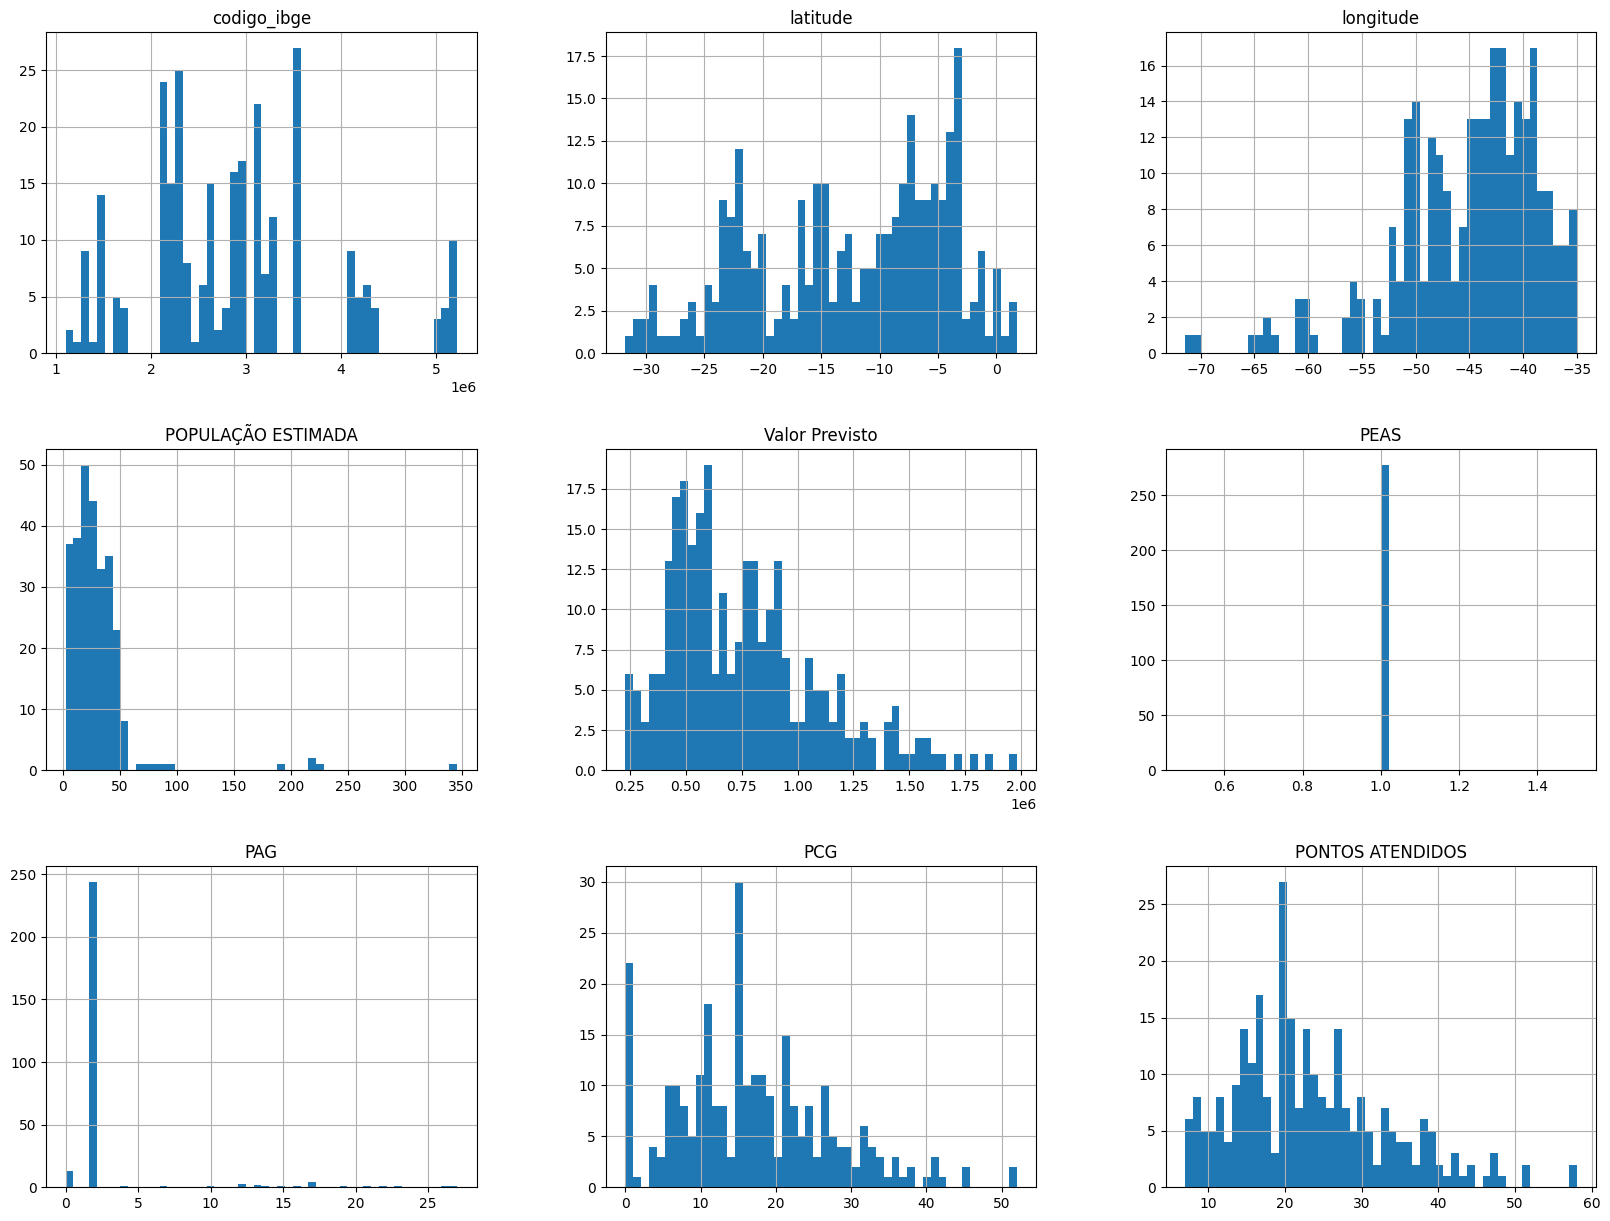

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# preparação dos dados

In [29]:
import numpy as np
X = np.c_[np.ones((278,1)), df['POPULAÇÃO ESTIMADA']]
y = df['Valor Previsto']

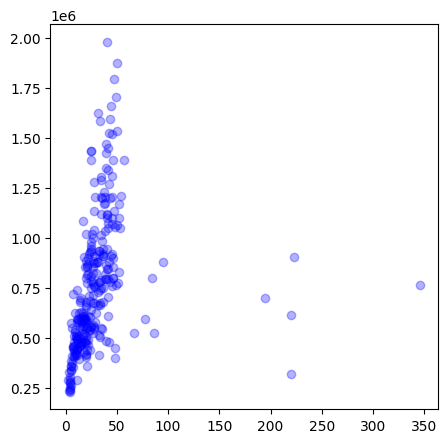

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(df['POPULAÇÃO ESTIMADA'], df['Valor Previsto'], color='b', alpha=0.3)

<Axes: xlabel='longitude', ylabel='latitude'>

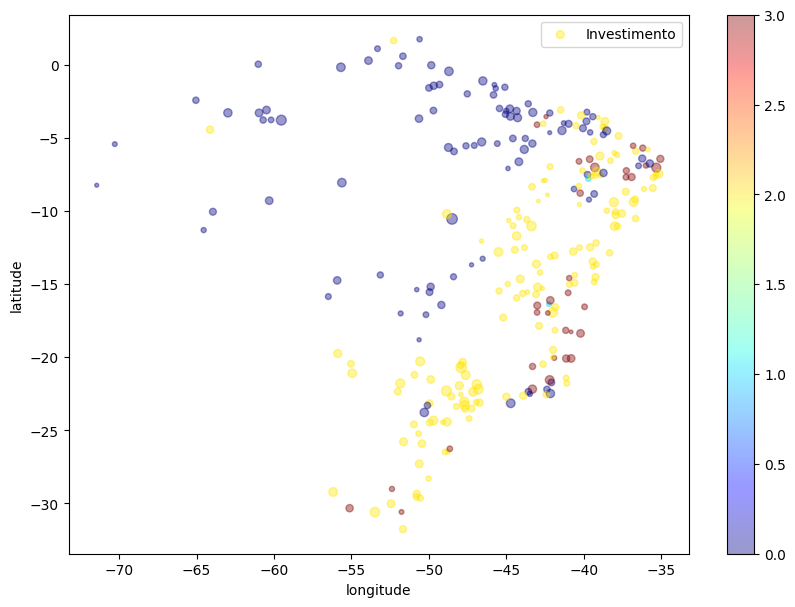

In [37]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
       s="PONTOS ATENDIDOS", label="Investimento", figsize=(10,7),
       c=status_encoded, cmap=plt.get_cmap("jet"), colorbar=True)

<Axes: xlabel='longitude', ylabel='latitude'>

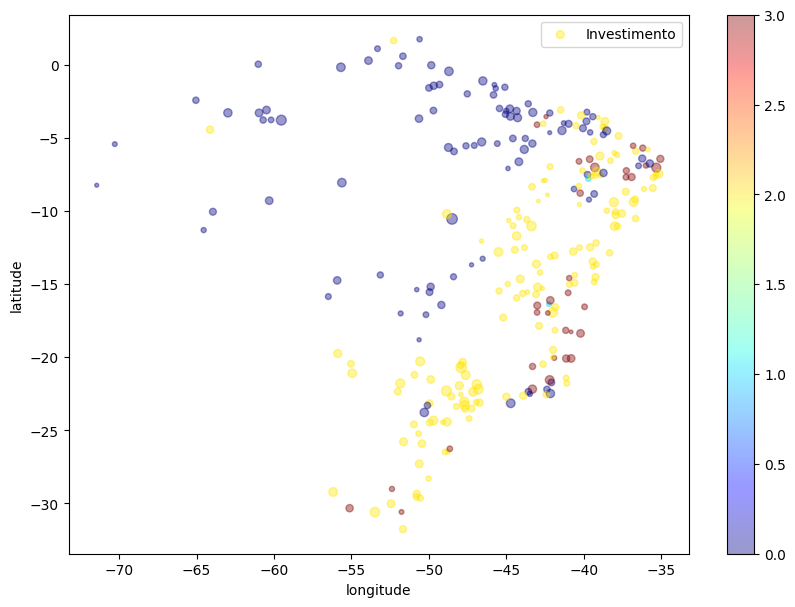

In [37]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
       s="PONTOS ATENDIDOS", label="Investimento", figsize=(10,7),
       c=status_encoded, cmap=plt.get_cmap("jet"), colorbar=True)

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
       s="PONTOS ATENDIDOS", label="Investimento", figsize=(10,7),
       c="Valor Previsto", cmap=plt.get_cmap("jet"), colorbar=True)

In [26]:
X.shape

(278, 2)

In [39]:
df_numeric = df[['latitude', 'longitude', 'POPULAÇÃO ESTIMADA', 'Valor Previsto', 'PEAS', 'PAG', 'PCG', 'PONTOS ATENDIDOS']]
corr_matrix = df_numeric.corr()
corr_matrix["Valor Previsto"].sort_values(ascending=False)

Valor Previsto        1.000000
PONTOS ATENDIDOS      0.720346
PCG                   0.664903
POPULAÇÃO ESTIMADA    0.243898
PAG                  -0.053267
longitude            -0.353570
latitude             -0.354898
PEAS                       NaN
Name: Valor Previsto, dtype: float64

In [26]:
X.shape

(278, 2)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criação do modelo 

# treinamento

In [28]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print ('Coefficients: ', lr_model.coef_)

Coefficients:  [   0.         4460.59544756]


# teste

In [29]:
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# resultados

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_pred_lr_train)
lr_train_r2 = r2_score(y_train, y_pred_lr_train)

lr_test_mse = mean_squared_error(y_test, y_pred_lr_test)
lr_test_r2 = r2_score(y_test, y_pred_lr_test)

In [31]:
print(f"LR MSE train error", lr_train_mse)
print(f"LR R2 train error", lr_train_r2)
print(f"LR MSE test error", lr_test_mse)
print(f"LR R2 test error", lr_test_r2)

LR MSE train error 101747740211.06813
LR R2 train error 0.11947637658818844
LR MSE test error 149053145893.63962
LR R2 test error -0.3998340995573677


# previsão

Text(0.5, 1.0, 'Linear Regression Model')

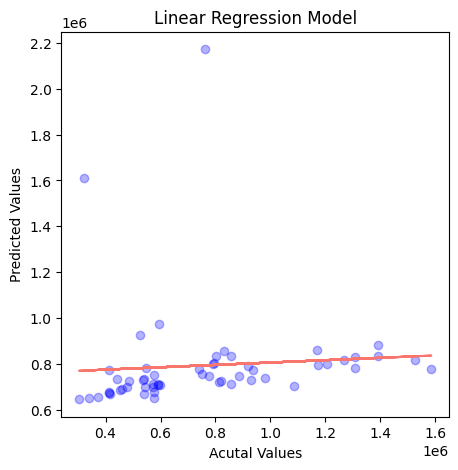

In [32]:
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_lr_test, color='b', alpha=0.3)

z = np.polyfit(y_test, y_pred_lr_test, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel("Predicted Values")
plt.xlabel("Acutal Values")
plt.title("Linear Regression Model")